# Problem Statement: Categorize countries via clustering based on the given socio-economic and health factors to determine which countries are lagging behind in development. 

## Souce of Data: Kaggle

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [144]:
dfc = pd.read_csv('/Users/marcmaestri/Downloads/archive-8/Country-data.csv')

## Explore Data

In [145]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [146]:
dfd = pd.read_csv('/Users/marcmaestri/Downloads/archive-8/data-dictionary.csv')

In [147]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column Name  10 non-null     object
 1   Description  10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [148]:
dfd

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [149]:
dfc.shape

(167, 10)

In [150]:
dfc.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [151]:
# drop country to cluster
dfc2 = country.drop(['country'], axis = 1).values

In [152]:
dfc2

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.82e+00, 5.53e+02, 0.00e+00],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 1.65e+00, 4.09e+03, 0.00e+00],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 2.89e+00, 4.46e+03, 0.00e+00],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 1.95e+00, 1.31e+03, 0.00e+00],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 4.67e+00, 1.31e+03, 0.00e+00],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.40e+00, 1.46e+03, 0.00e+00]])

## KMeans

In [153]:
# use kmeans - WCSS
WCSS = []
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=9)
    kmeans.fit(dfc2)
    WCSS.append(kmeans.inertia_)
print(WCSS)

[117459687597.19795, 36528388034.59709, 21710210122.080032, 14610713446.535133, 10665874403.203148, 7655725131.181807, 5353767501.541844, 4260514858.505644, 3249350817.4864583, 2709452503.409109, 2189978165.8768806, 1861352754.953147, 1526732020.787705, 1253194266.358962]


#### Plot to check the variation in WCSS with change in number of clusters

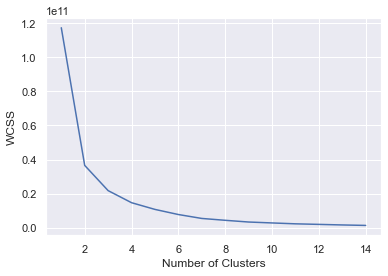

In [154]:
sns.set()
plt.plot(range(1,15),WCSS)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### I see that increasing the number of clusters, WCSS decreases. Consider 4 clusters which looks optimal

### Training Model

In [155]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=9)
y =kmeans.fit_predict(dfc2)
y

array([0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 2, 3, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 3, 2, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0], dtype=int32)

##### Add the cluster to the dataframe

In [156]:
dfc['Cluster'] = y

In [157]:
dfc.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'Cluster'],
      dtype='object')

### Plotting to see the distribution of data in relation with the Clusters

In [158]:
l= ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

In [159]:
dfc[l[2]]

0      7.58
1      6.55
2      4.17
3      2.85
4      6.03
       ... 
162    5.25
163    4.91
164    6.84
165    5.18
166    5.89
Name: health, Length: 167, dtype: float64

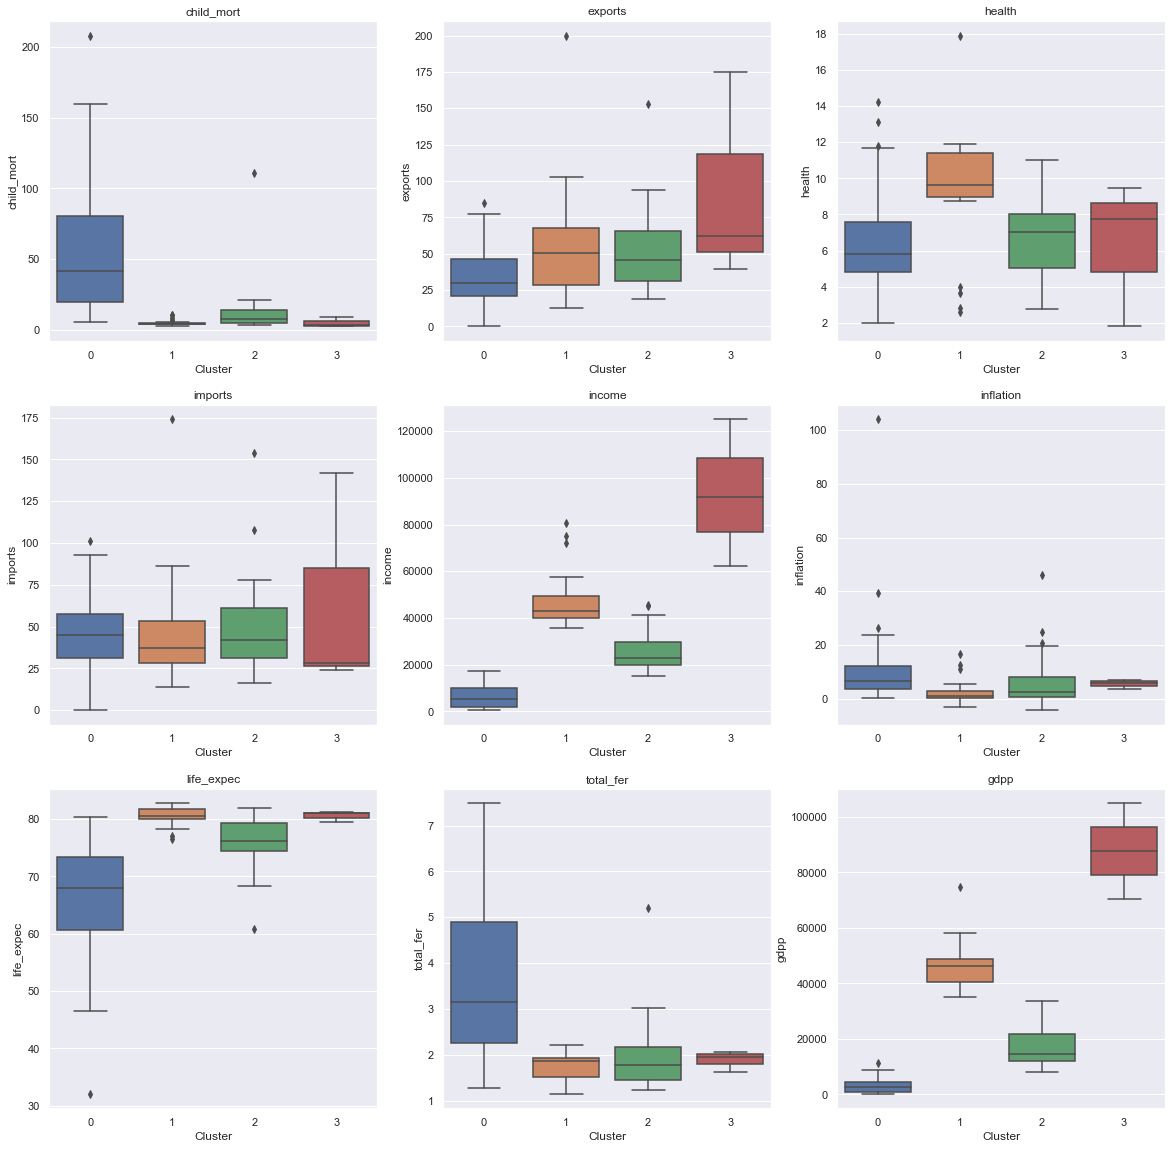

In [160]:
#plot the clusters
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data = dfc, x = 'Cluster',y = dfc[l[i]])
    plt.title(l[i])

### Findings: From this visual I can tell cluster 0 tends to be in the worst state in terms of development and quality of life. With a significant and clear higher child mortality rate and fertility rate (and lower health), cluster 0 seems to be early stage developing countries with high population growth and bad healthcare (to explain high mortality). Cluster o also has lower GDP per capita, lower income, lower exports and higher inflation. These are indicators that these countries are lagging behind the rest of the world in development. 

In [161]:
# Display the countries in each cluster 
dfc_0=dfc[dfc['Cluster']==0]
dfc_1=dfc[dfc['Cluster']==1]
dfc_2=dfc[dfc['Cluster']==2]
dfc_3=dfc[dfc['Cluster']==3]

In [162]:
dfc_0


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0
...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [163]:
dfc_1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,1
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,1
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,1


In [164]:
dfc_2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,2
33,Chile,8.7,37.7,7.96,31.3,19400,8.960,79.1,1.88,12900,2
41,Croatia,5.5,37.6,7.76,38.1,20100,0.821,76.3,1.55,13500,2
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,2
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100,2


In [165]:
dfc_3

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000,3
114,Norway,3.2,39.7,9.48,28.5,62300,5.95,81.0,1.95,87800,3
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300,3


### By clustering these countries, we can tell where countries are in the stages of development, and which are doing better than others. Cluster 0 could use support from more developed, richier countries, such as cluster 1. 